# Fractales

In [139]:
# import useful python packages
import numpy as np # for vector and matrix manipulations
import matplotlib.pyplot as plt # for plotting
import seaborn as sb # for plotting nicer

sb.set_theme(context="notebook", style="ticks")

## Fonctions utiles

In [10]:
# Integrate the logistic map
def integrate(f, x0, n_times, map_params=()):
    solution = np.zeros(n_times+1)
    solution[0] = x0
    for it in range(1, n_times+1):
        solution[it] = f(solution[it-1], *map_params)
    return solution


def plot_cobweb(f, x0, n_times, vmin=0, vmax=1, ax=None, map_params=()):

    if ax is None:
        ax = plt.gca()
    ax.set_aspect("equal")
    

    # draw map
    x = np.linspace(vmin, vmax, 500)
    y = np.array([f(xi, *map_params) for xi in x])
    ax.plot(x, y, color='k', label="map", zorder=-1)

    # draw diagonal
    ax.plot(x, x, ls='--', c="k", zorder=-2)

    # draw cobweb
    xn = x0
    for i in range(n_times):  # Use fewer iterations for clarity
        ax.plot([xn, xn], [xn, f(xn, *map_params)], c="b", alpha=0.6)
        ax.plot([xn, f(xn, *map_params)], [f(xn, *map_params), f(xn, *map_params)], c="b", alpha=0.8)

        if i==n_times-1:
            ax.plot([f(xn, *map_params)], [f(xn, *map_params)], "bo", mfc="w", alpha=0.8)
        
        xn = f(xn, *map_params)


    ax.set_xlabel("$x_n$")
    ax.set_ylabel("$x_{n+1} = f(x_n)$")

    return ax 

## Box counting dimension

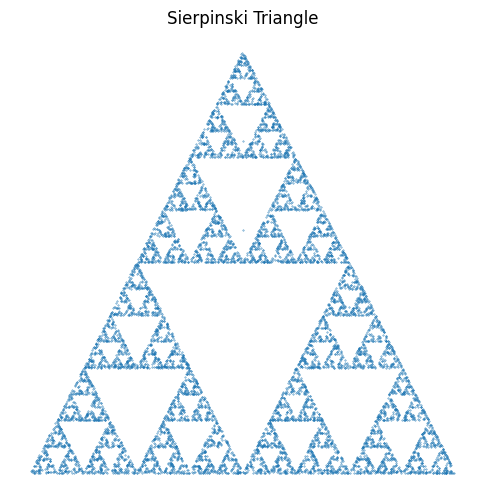

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate Sierpinski triangle
def sierpinski_triangle(n_iter=5):
    points = [(0, 0), (1, 0), (0.5, np.sqrt(3)/2)]
    x, y = [0.5], [0.5]
    for _ in range(n_iter):
        idx = np.random.randint(0, 3)
        x.append((x[-1] + points[idx][0]) / 2)
        y.append((y[-1] + points[idx][1]) / 2)
    return x, y

x, y = sierpinski_triangle(10000)

# Plot
plt.figure(figsize=(6, 6))
plt.scatter(x, y, s=0.1)
plt.title("Sierpinski Triangle")
plt.axis("off")
plt.show()

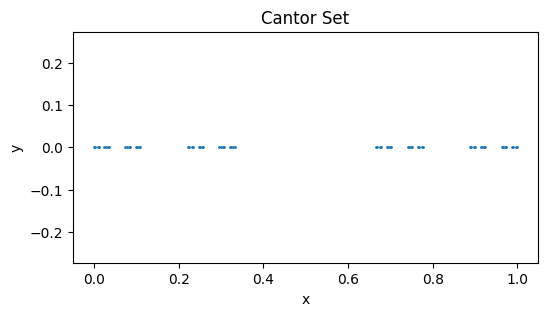

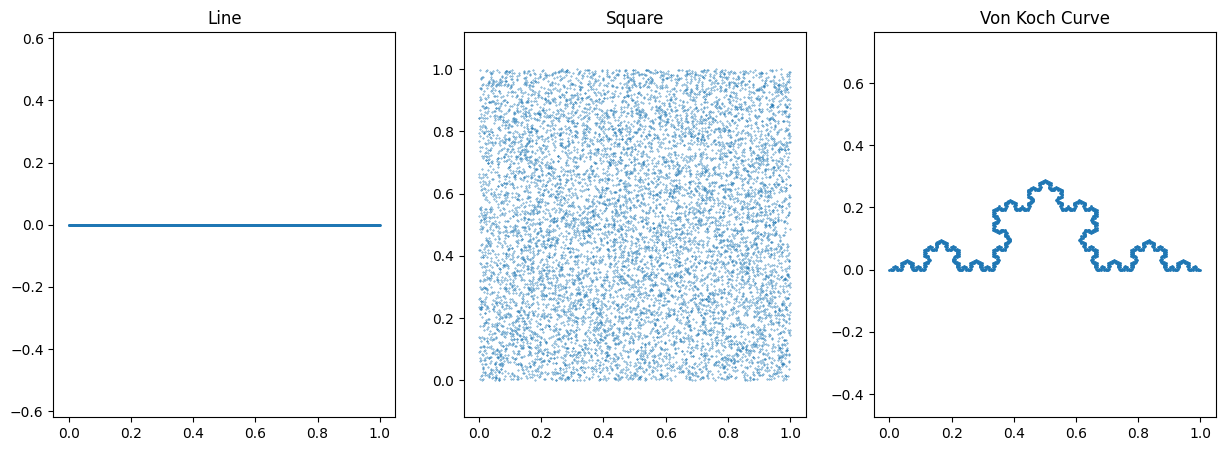

In [5]:

# Generate points for a straight line
def generate_line():
    x = np.linspace(0, 1, 1000)
    y = np.zeros_like(x)
    return x, y

# Generate points for a square (filled)
def generate_square():
    x = np.random.rand(10000)
    y = np.random.rand(10000)
    return x, y

# Generate points for the von Koch curve
def von_koch_curve(iterations):
    points = np.array([[0, 0], [1, 0]])
    for _ in range(iterations):
        new_points = []
        for i in range(len(points) - 1):
            p1 = points[i]
            p2 = points[i + 1]
            dx, dy = p2 - p1
            new_points.append(p1)
            new_points.append(p1 + [dx / 3, dy / 3])
            new_points.append(p1 + [dx / 2 - np.sqrt(3) * dy / 6, dy / 2 + np.sqrt(3) * dx / 6])
            new_points.append(p1 + [2 * dx / 3, 2 * dy / 3])
        new_points.append(points[-1])
        points = np.array(new_points)
    return points[:, 0], points[:, 1]

# Generate the Cantor set points
def cantor_set(iterations):
    segments = [0, 1]  # Start with the interval [0, 1]
    for _ in range(iterations):
        new_segments = []
        for i in range(0, len(segments) - 1, 2):
            a, b = segments[i], segments[i + 1]
            new_segments.extend([a, (2 * a + b) / 3, (a + 2 * b) / 3, b])
        segments = new_segments
    x = segments[::2]  # Start of each segment
    y = np.zeros_like(x)  # y-coordinates for visualization
    return np.array(x), np.array(y)

# Generate the Cantor set
x_cantor, y_cantor = cantor_set(6)

# Visualize the Cantor set
plt.figure(figsize=(6, 3))
plt.scatter(x_cantor, y_cantor, s=1)
plt.title("Cantor Set")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.show()


# Generate the datasets
x_line, y_line = generate_line()
x_square, y_square = generate_square()
x_koch, y_koch = von_koch_curve(5)

# Visualize the shapes
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].scatter(x_line, y_line, s=1)
axs[0].set_title("Line")
axs[1].scatter(x_square, y_square, s=0.1)
axs[1].set_title("Square")
axs[2].scatter(x_koch, y_koch, s=1)
axs[2].set_title("Von Koch Curve")
for ax in axs:
    ax.axis("equal")
plt.show()


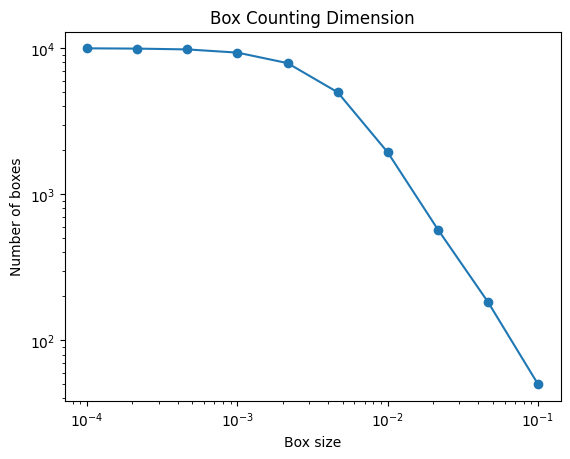

Estimated box dimension: 0.75


In [2]:


# Box counting function
def box_counting(x, y, box_sizes):
    counts = []
    for box_size in box_sizes:
        grid_x = np.floor(x / box_size).astype(int)
        grid_y = np.floor(y / box_size).astype(int)
        counts.append(len(set(zip(grid_x, grid_y))))
    return counts

# Compute and plot box dimension
box_sizes = np.logspace(-4, -1, 10)
counts = box_counting(np.array(x), np.array(y), box_sizes)

plt.loglog(box_sizes, counts, 'o-')
plt.xlabel("Box size")
plt.ylabel("Number of boxes")
plt.title("Box Counting Dimension")
plt.show()

# Linear fit to estimate box dimension
coeffs = np.polyfit(np.log(box_sizes), np.log(counts), 1)
print(f"Estimated box dimension: {-coeffs[0]:.2f}")


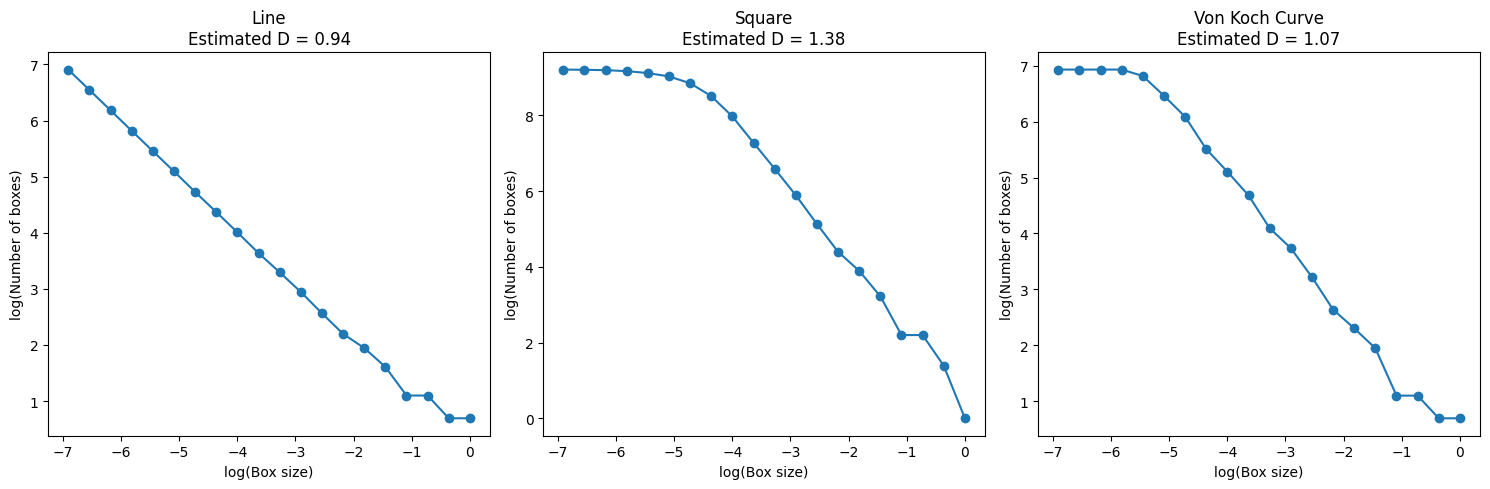

In [4]:
# Box counting function
def box_counting(x, y, box_sizes):
    counts = []
    for box_size in box_sizes:
        grid_x = np.floor(x / box_size).astype(int)
        grid_y = np.floor(y / box_size).astype(int)
        counts.append(len(set(zip(grid_x, grid_y))))
    return counts

# Compute box counting dimensions for each shape
box_sizes = np.logspace(-3, 0, 20)
line_counts = box_counting(x_line, y_line, box_sizes)
square_counts = box_counting(x_square, y_square, box_sizes)
koch_counts = box_counting(x_koch, y_koch, box_sizes)

# Log-log plots and linear fits for dimension estimation
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for ax, counts, title in zip(axs, [line_counts, square_counts, koch_counts], 
                             ["Line", "Square", "Von Koch Curve"]):
    log_sizes = np.log(box_sizes)
    log_counts = np.log(counts)
    ax.plot(log_sizes, log_counts, 'o-')
    coeffs = np.polyfit(log_sizes, log_counts, 1)
    ax.set_title(f"{title}\nEstimated D = {-coeffs[0]:.2f}")
    ax.set_xlabel("log(Box size)")
    ax.set_ylabel("log(Number of boxes)")

plt.tight_layout()
plt.show()


## Exemple simple

In [13]:
def henon_map(x, a=1.4, b=0.3):
    a, b = map_params
    x_new = 1 - a * x[0] ** 2 + x[1]
    y_new = b * x[0]
    return np.array([x_new, y_new])

def integrate(f, x0, n_times, map_params=()):
    solution = np.zeros((n_times + 1, len(x0)))
    solution[0] = x0
    for it in range(1, n_times + 1):
        solution[it] = f(solution[it - 1], *map_params)
    return solution

In [42]:
# Parameters
x0 = [0.9, 0.2]

n_times = 10000
map_params = (1.4, 0.3)

# integrate the system
solution = integrate(henon_map, x0, n_times, map_params)

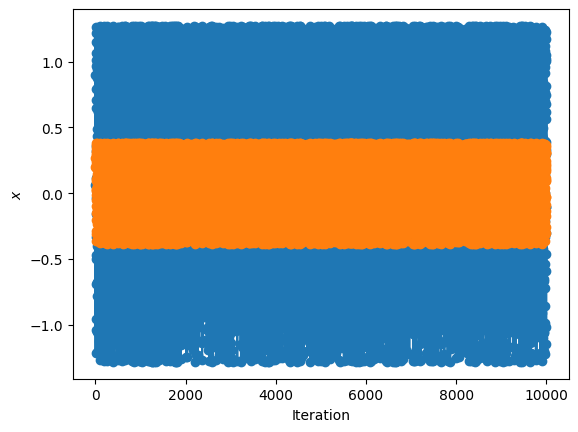

In [43]:
# Visualization
fig, ax = plt.subplots()

ax.plot(range(n_times+1), solution, "o-")
ax.set_xlabel("Iteration")
ax.set_ylabel("$x$")

plt.show()

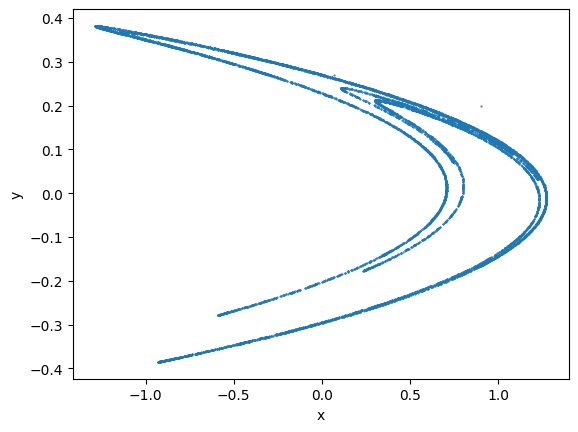

In [45]:
fig, ax = plt.subplots()

ax.plot(solution[:,0], solution[:,1], "o", ms=0.5)

ax.set_xlabel("x")
ax.set_ylabel("y")

plt.show()

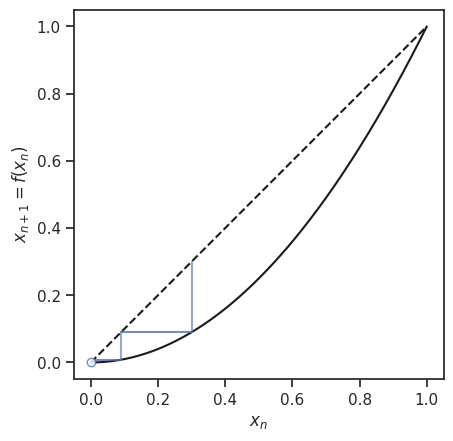

In [149]:
x0 = 0.3
n_times = 100

plot_cobweb(square_map, x0, n_times)

plt.show()

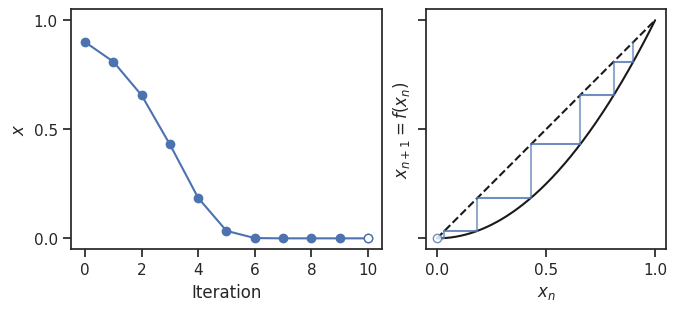

In [150]:
x0 = 0.9
n_times = 10

# integrate the system
solution = integrate(square_map, x0, n_times)

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, layout="constrained", figsize=(7, 3)) #, width_ratios=(2, 1))

ax1.plot(range(n_times+1), solution, "o-")
ax1.plot(range(n_times+1)[-1], solution[-1], "bo-", mfc="w")
ax1.set_yticks([0, 0.5, 1])

ax1.set_xlabel("Iteration")
ax1.set_ylabel("$x$")

plot_cobweb(square_map, x0, n_times, ax=ax2)
ax2.set_xticks([0, 0.5, 1])

plt.savefig("square_map.png", dpi=250, transparent=True, bbox_inches="tight", pad_inches=0.1)

plt.show()

## Application logistique

In [151]:
def logistic_map(x, r=1):
    return r * x * (1 - x)

In [152]:
# Parameters
x0 = 0.2
n_times = 150

r = 0.9
args = (r, )

# integrate the system
solution = integrate(logistic_map, x0, n_times, args)

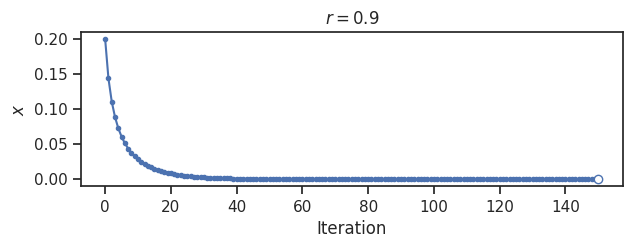

In [153]:
# Visualization
fig, ax = plt.subplots(figsize=(7, 2))

ax.plot(range(n_times+1), solution, "o-", ms=3)
ax.plot(range(n_times+1)[-1], solution[-1], "bo-", mfc="w")

ax.set_xlabel("Iteration")
ax.set_ylabel("$x$")

ax.set_title(f"$r={r}$")

plt.savefig(f"logistic_map_r_{r}_timeseries.png", dpi=250, transparent=True, bbox_inches="tight", pad_inches=0.1)

plt.show()

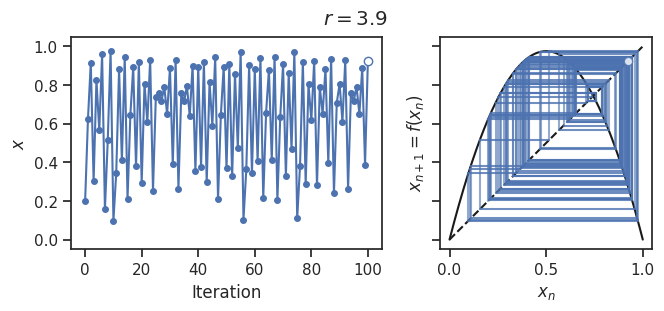

In [171]:
x0 = 0.2
n_times = 100

r = 3.9
args = (r, )

# integrate the system
solution = integrate(logistic_map, x0, n_times, args)

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, layout="constrained", figsize=(7, 3)) #, width_ratios=(2, 1))

ax1.plot(range(n_times+1), solution, "o-", ms=4)
ax1.plot(range(n_times+1)[-1], solution[-1], "bo-", mfc="w")

ax1.set_xlabel("Iteration")
ax1.set_ylabel("$x$")

plot_cobweb(logistic_map, x0, n_times, map_params=args, ax=ax2)

plt.suptitle(f"$r={r}$")

plt.savefig(f"logistic_map_r_{r}.png", dpi=250, transparent=True, bbox_inches="tight", pad_inches=0.1)


plt.show()